# <font color='red'>Information About the Project. </font> 

The main idea emphasized in this study is to discuss whether the selection of algorithms applied to the data by using agricultural data or the dataset before the algorithms are essential. This issue will be addressed in depth in the conclusion section at the end of the project.

## <font color='red'>Scenario 1. </font> 

In the first scenario, the agricultural production power of the mentioned countries was tried to be calculated by using the variables **(1) Suitable for Agriculture, (2) Number of Persons Working in the Agricultural Field, (3) Annual Average Rainfall, and (4) Annual Average Temperature**. The primary purpose of this study is to discuss whether all of these variables are effective in the agricultural production of countries or whether the developing technologies and innovative changes in the farming field are more important than these accepted variables.

## <font color='red'>Section 1. Data Understanding </font> 

#### 1.1 Importing Required Libraries

In [5]:
import pandas as pd
import numpy as np 
import warnings
import seaborn as sns # For Visualization
import matplotlib.pyplot as plt #For Visualization
from scipy.stats import skew # For Skewness
from scipy import stats # For General Statistics
import pylab as p # For Skewness
from scipy.stats import kurtosis #For Kurtosis
from scipy import stats
from scipy.stats import chisquare
import missingno as msno
from sklearn.neighbors import LocalOutlierFactor # AnomalyDetection
from scipy.stats import wilcoxon
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import mannwhitneyu
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor #  Regressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV 


warnings.filterwarnings('ignore')

#### 1.2. Loading The Data Into The DataFrame

In [13]:
arable_land           = pd.read_csv("Countries Arable Lands - 1990-2020.csv")
people_in_farm        = pd.read_csv("Number of People Working in Agriculture 1990-2020.csv")
precipitation         = pd.read_csv("Observed Average Annual Mean-Precipitation - 1990-2020.csv")
temperature           = pd.read_csv("Observed Average Annual Mean-Temperature-1990-2020.csv")
agriculture_ie        = pd.read_csv("Irelands Agriculture Data -1990-2020.csv")
agriculture_de        = pd.read_csv("Germany_s-Agriculture-Data-1990-2020.csv")
agriculture_nl        = pd.read_csv("Netherland_s-Agriculture-Data-1990-2020.csv")
potatoes_ie           = agriculture_ie.iloc[:,3:4]
potatoes_de           = agriculture_de.iloc[:,3:4]
potatoes_nl           = agriculture_nl.iloc[:,3:4]

# Each dataset has a "year" column. So, it is dropped to avoid confusion.
people_in_farm        = people_in_farm.drop(["Year"], axis=1) 
precipitation         = precipitation.drop(["Year"],axis=1)
temperature           = temperature.drop(["Year"], axis=1) 

#### 1.3. Loading The Data Into The DataFrame

In [14]:
# 1.3.1 Ireland Dataset Prepared
year_hectar_ireland    = arable_land.iloc[:,0:2]
people_farm_ireland    = people_in_farm.iloc[:,0:1]
precipitation_ireland  = precipitation.iloc[:,0:1]
temperature_ireland    = temperature.iloc[:,0:1]

columns_ireland = [year_hectar_ireland, people_farm_ireland, precipitation_ireland,temperature_ireland,potatoes_ie]
ireland_dataset = pd.concat((columns_ireland),axis=1)

In [15]:
# 1.3.2 Germany Dataset Prepared
year_hectar_germany     = arable_land.iloc[:,2:3]
people_farm_germany     = people_in_farm.iloc[:,1:2]
precipitation_germany   = precipitation.iloc[:,1:2]
temperature_germany     = temperature.iloc[:,1:2]

columns_germany  = [year_hectar_germany,people_farm_germany,precipitation_germany,temperature_germany,potatoes_de]
germany_dataset  = pd.concat((columns_germany),axis=1)

In [16]:
# 1.3.3 Netherland Dataset Prepared
year_hectar_netherland     = arable_land.iloc[:,3:4]
people_farm_netherland     = people_in_farm.iloc[:,2:3]
precipitation_netherland   = precipitation.iloc[:,2:3]
temperature_netherland     = temperature.iloc[:,2:3]

columns_netherland  = [year_hectar_netherland,people_farm_netherland,precipitation_netherland,temperature_netherland,potatoes_nl]
netherland_dataset  = pd.concat((columns_netherland),axis=1)

#### 1.4 Basic Information About Data

In [17]:
# 1.4.1 Check Shape of Datasets
print("Shape of Ireland Dataset is ..:", ireland_dataset.shape)
print("Shape of Germany Dataset is ..:", germany_dataset.shape)
print("Shape of Netherland Dataset is ..:", netherland_dataset.shape)

Shape of Ireland Dataset is ..: (31, 6)
Shape of Germany Dataset is ..: (31, 5)
Shape of Netherland Dataset is ..: (31, 5)


In [18]:
# 1.4.2 DTypes.. 
print("DTypes of Ireland Dataset is ..:\n", ireland_dataset.dtypes)
print("-------------")

print("DTypes of Germany Dataset is ..:\n", germany_dataset.dtypes);
print("-------------")

print("DTypes of Netherland Dataset is ..:\n", netherland_dataset.dtypes);

DTypes of Ireland Dataset is ..:
 Year                   int64
Ireland(hectares)    float64
Ireland              float64
Ireland(mm)          float64
Ireland(C)           float64
Potatoes(Tonnes)       int64
dtype: object
-------------
DTypes of Germany Dataset is ..:
 Germany(hectares)    float64
Germany              float64
Germany(mm)          float64
Germany(C)           float64
Potatoes(Tonnes)     float64
dtype: object
-------------
DTypes of Netherland Dataset is ..:
 Netherlands(hectares)    float64
Netherlands              float64
Netherlands(mm)          float64
Netherlands(C)           float64
Potatoes(Tonnes)         float64
dtype: object


In [19]:
# 1.4.3 Info on Dataset
print("Ireland Dataset info ...:");
ireland_dataset.info();

Ireland Dataset info ...:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               31 non-null     int64  
 1   Ireland(hectares)  31 non-null     float64
 2   Ireland            29 non-null     float64
 3   Ireland(mm)        31 non-null     float64
 4   Ireland(C)         31 non-null     float64
 5   Potatoes(Tonnes)   31 non-null     int64  
dtypes: float64(4), int64(2)
memory usage: 1.6 KB


In [20]:
print("Germany Dataset info ...:");
germany_dataset.info();

Germany Dataset info ...:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Germany(hectares)  31 non-null     float64
 1   Germany            29 non-null     float64
 2   Germany(mm)        31 non-null     float64
 3   Germany(C)         31 non-null     float64
 4   Potatoes(Tonnes)   31 non-null     float64
dtypes: float64(5)
memory usage: 1.3 KB


In [21]:
print("Netherland Dataset info ...:");
netherland_dataset.info();

Netherland Dataset info ...:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Netherlands(hectares)  31 non-null     float64
 1   Netherlands            29 non-null     float64
 2   Netherlands(mm)        31 non-null     float64
 3   Netherlands(C)         31 non-null     float64
 4   Potatoes(Tonnes)       31 non-null     float64
dtypes: float64(5)
memory usage: 1.3 KB


In [22]:
# 1.4.4  Take a Look at the Datas
#Ireland
print("Ireland Datasets Info...:")
ireland_dataset.head()

Ireland Datasets Info...:


,Year,Ireland(hectares),Ireland,Ireland(mm),Ireland(C),Potatoes(Tonnes)
0,1990,382200.0,NaN,1186.73,10.01,605000
1,1991,370200.0,202332.0,1070.58,9.51,571000
2,1992,344200.0,195727.0,1129.81,9.45,638000
3,1993,364200.0,194929.0,1229.93,9.28,569000
4,1994,355200.0,191292.0,1309.49,9.49,642000


In [23]:
# Germany
print("Germany Datasets Info...:")
germany_dataset.head()

Germany Datasets Info...:


,Germany(hectares),Germany,Germany(mm),Germany(C),Potatoes(Tonnes)
0,11971000.0,NaN,734.15,9.81,14471000.0
1,11559000.0,1390000.0,604.17,8.73,10200971.0
2,11467000.0,1360000.0,735.03,9.64,10896995.0
3,11676000.0,1330000.0,793.47,8.76,12260248.0
4,11805000.0,1300000.0,789.20,9.94,9668572.0


In [24]:
# Netherland
print("Netherland Datasets Info...:")
netherland_dataset.head()

Netherland Datasets Info...:


,Netherlands(hectares),Netherlands,Netherlands(mm),Netherlands(C),Potatoes(Tonnes)
0,879000.0,NaN,729.29,10.74,7036200.0
1,881000.0,298410.0,657.72,9.52,6949201.0
2,887000.0,296570.0,813.90,10.39,7641000.0
3,887000.0,293098.0,868.94,9.49,7698500.0
4,885000.0,291458.0,888.58,10.55,7088000.0


In [25]:
# 1.4.5 Correlation.

# Ireland
ireland_dataset.corr()["Potatoes(Tonnes)"].sort_values()

Year                -0.845717
Ireland(hectares)   -0.544869
Ireland(mm)         -0.217357
Ireland(C)          -0.135321
Ireland              0.798888
Potatoes(Tonnes)     1.000000
Name: Potatoes(Tonnes), dtype: float64

In [26]:
# Germany
germany_dataset.corr()["Potatoes(Tonnes)"].sort_values()

Germany(C)          -0.136553
Germany              0.187885
Germany(mm)          0.198284
Germany(hectares)    0.272392
Potatoes(Tonnes)     1.000000
Name: Potatoes(Tonnes), dtype: float64

In [27]:
# Netherland
netherland_dataset.corr()["Potatoes(Tonnes)"].sort_values()

Netherlands(hectares)   -0.286034
Netherlands(C)          -0.189043
Netherlands(mm)         -0.038016
Netherlands              0.225405
Potatoes(Tonnes)         1.000000
Name: Potatoes(Tonnes), dtype: float64

#### 1.5  Descriptive Statistics Process

In this section, the statistical properties of the data set in general (quantity, mean, minimum and maximum value, standard deviation, quarters such as 25%, 50% and 75%) will be determined, histograms of the data sets will be drawn, and Box Plot charts will be drawn to determine the interquartile range. In addition, Skewness and Variance values will be found and interpreted at the reporting stage.

In [28]:
# 1.5.1. Describe the Data

# Ireland
print("Ireland Dataset Basic Statistical Expressions..:")
ireland_dataset.describe().T

# Burayı yorumlayabiliriz. Mesela diyebiliriz ki İrlandanın hektarı 344.200 ile 531.230 hektar arasında değişiyor, hollandanın
# su sekilde almanya bu sekilde vs. Hatta buradan hareketle veri setindeki en küçük hektar sudur budur vs. Bunu bütün veriler kolonlar
# için yapabiliriz!. 

Ireland Dataset Basic Statistical Expressions..:


,count,mean,std,min,25%,50%,75%,max
Year,31.0,2005.000000,9.092121,1990.00,1997.50,2005.00,2012.500,2020.00
Ireland(hectares),31.0,441314.516129,52014.682468,344200.00,395700.00,453000.00,470560.000,531230.00
Ireland,29.0,144415.413793,28296.054688,107638.00,126620.00,130569.00,157451.000,202332.00
Ireland(mm),31.0,1204.098065,118.529419,971.09,1123.33,1186.73,1299.445,1451.22
Ireland(C),31.0,9.744194,0.339733,8.72,9.51,9.77,10.010,10.28
Potatoes(Tonnes),31.0,455914.677419,120641.783039,232000.00,371235.00,419600.00,555600.000,733000.00


In [29]:
# Germany
print("Germany Dataset Basic Statistical Expressions..:")
germany_dataset.describe().T

Germany Dataset Basic Statistical Expressions..:


,count,mean,std,min,25%,50%,75%,max
Germany(hectares),31.0,1.181058e+07,1.072140e+05,11467000.00,1.178150e+07,11834000.00,1.187550e+07,11971000.00
Germany,29.0,9.203789e+05,2.824038e+05,530842.00,6.510590e+05,957214.00,1.160000e+06,1390000.00
Germany(mm),31.0,7.290574e+02,8.044148e+01,568.34,6.769150e+02,731.39,7.853200e+02,910.58
Germany(C),31.0,9.598065e+00,7.107434e-01,7.57,9.195000e+00,9.74,9.985000e+00,10.79
Potatoes(Tonnes),31.0,1.123238e+07,1.201333e+06,8920800.00,1.028559e+07,11369000.00,1.169910e+07,14471000.00


In [30]:
# Netherland
print("Netherland Dataset Basic Statistical Expressions..:")
netherland_dataset.describe().T

Netherland Dataset Basic Statistical Expressions..:


,count,mean,std,min,25%,50%,75%,max
Netherlands(hectares),31.0,9.939074e+05,77383.054388,879000.00,903500.000,1015200.00,1043500.000,1127500.00
Netherlands,29.0,2.585518e+05,37406.046421,188736.00,244637.000,270182.00,284494.000,310328.00
Netherlands(mm),31.0,7.988510e+02,97.660073,585.78,754.040,807.40,864.005,1020.33
Netherlands(C),31.0,1.047839e+01,0.704363,8.37,10.245,10.55,10.870,11.66
Potatoes(Tonnes),31.0,7.072371e+06,645296.513001,5249400.00,6771309.000,7036200.00,7377309.500,8331000.00


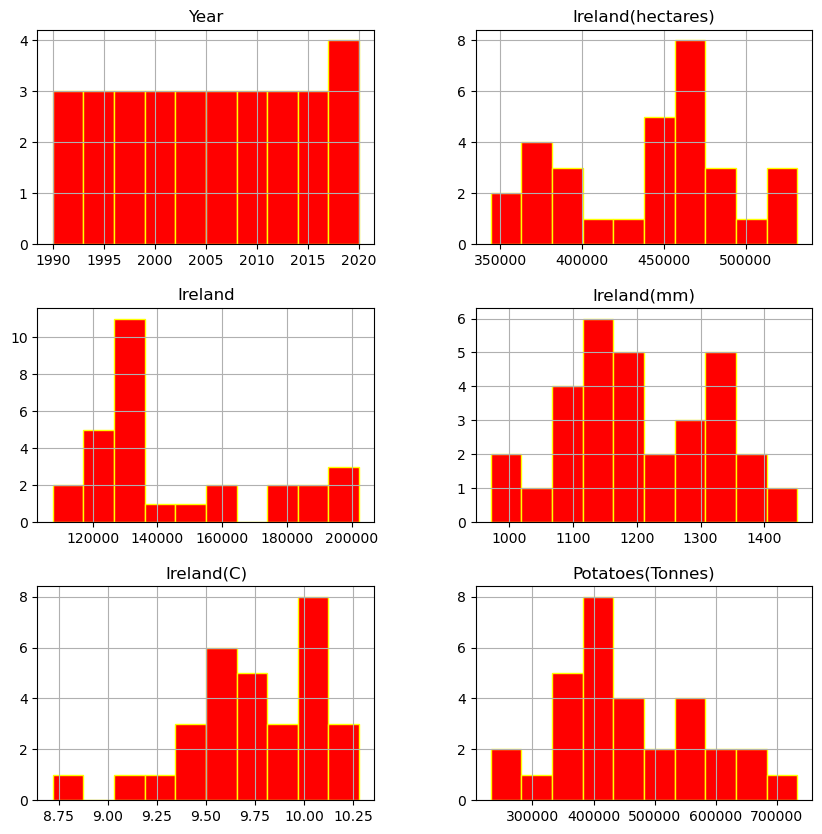

In [31]:
# 1.5.2 Producing Histogram for Datasets
# Producing Histogram for Each Variable of Ireland
ireland_dataset.hist(figsize = (10,10), color = "Red", edgecolor = "Yellow" );

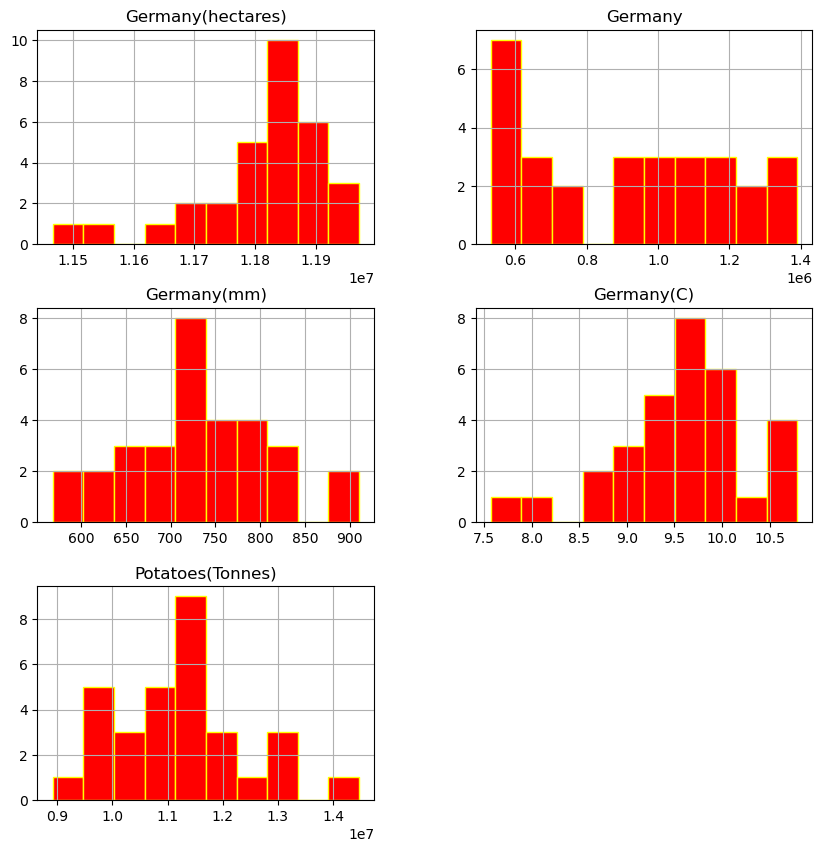

In [32]:
# Producing Histogram for Each Variable of Germany
germany_dataset.hist(figsize = (10,10), color = "Red", edgecolor = "Yellow");

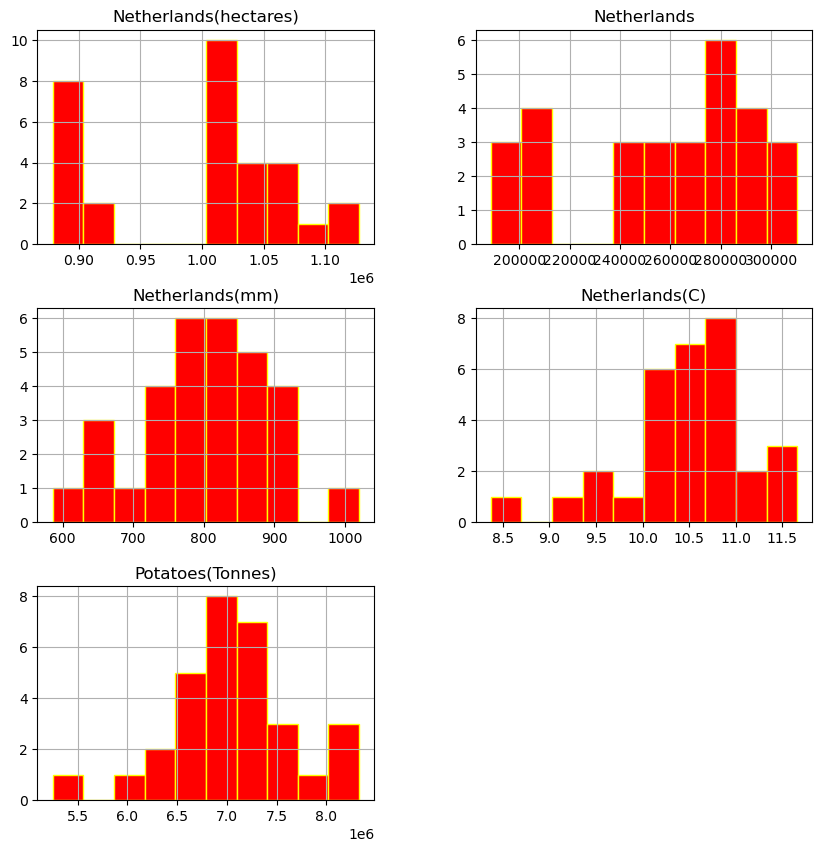

In [33]:
# Producing Histogram for Each Variable of Netherland
netherland_dataset.hist(figsize = (10,10), color = "Red", edgecolor = "Yellow");

#### Ireland Boxplots

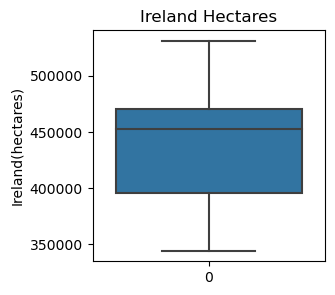

In [34]:
# Burada Anlaşılmayı Arttırmak İçin Böyle Yaptık bunu belirt!. 
hectares         = ireland_dataset["Ireland(hectares)"]
ireland          = ireland_dataset["Ireland"]
ireland_mm       = ireland_dataset["Ireland(mm)"]
ireland_c        = ireland_dataset["Ireland(C)"]
ireland_potatoes = ireland_dataset["Potatoes(Tonnes)"]
# 1. Hectares Boxplot
fig = plt.figure(figsize =(3, 3))
plt.title("Ireland Hectares")
plt.ylabel("Ireland(hectares)")
sns.boxplot(hectares);

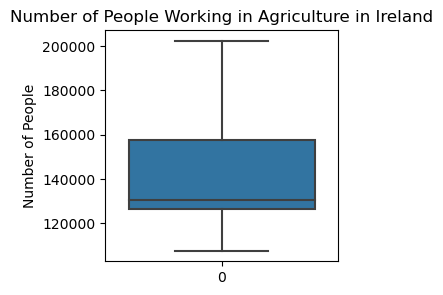

In [35]:
# 2. People who work in Ireland Agriculture
fig = plt.figure(figsize =(3, 3))
plt.title("Number of People Working in Agriculture in Ireland")
plt.ylabel("Number of People")
sns.boxplot(ireland);

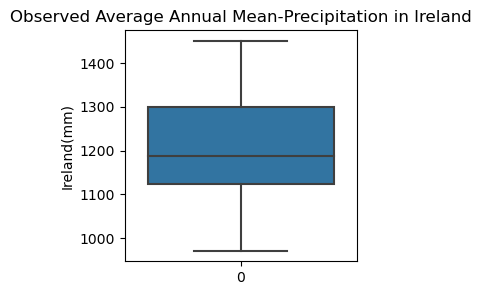

In [36]:
# 3. Observed Average Annual Mean Precipitation in Ireland
fig = plt.figure(figsize =(3, 3))
plt.title("Observed Average Annual Mean-Precipitation in Ireland")
plt.ylabel("Ireland(mm)")
sns.boxplot(ireland_mm);

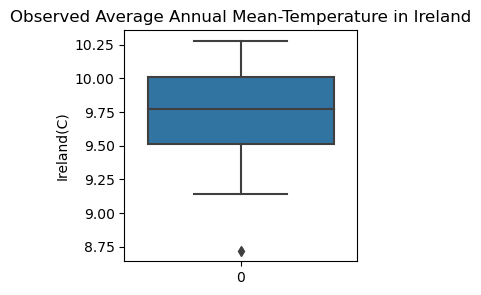

In [37]:
# 4. Observed Average Annual Mean-Temperature in Ireland
fig = plt.figure(figsize =(3, 3))
plt.title("Observed Average Annual Mean-Temperature in Ireland")
plt.ylabel("Ireland(C)")
sns.boxplot(ireland_c);

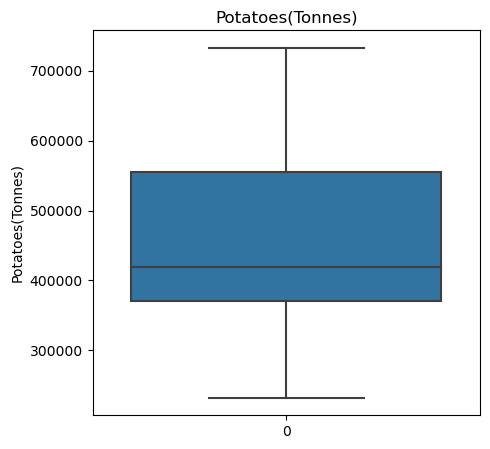

In [38]:
# 5. Ireland Total Production (Tonnes)
fig = plt.figure(figsize =(5, 5))
plt.title("Potatoes(Tonnes)")
plt.ylabel("Potatoes(Tonnes)")
sns.boxplot(ireland_potatoes);

In [39]:
germany_dataset.columns

Index(['Germany(hectares)', 'Germany', 'Germany(mm)', 'Germany(C)',
       'Potatoes(Tonnes)'],
      dtype='object')

#### Germany Boxplots

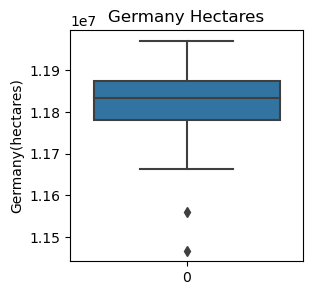

In [40]:
# Burada Anlaşılmayı Arttırmak İçin Böyle Yaptık bunu belirt!. 
# 1. Germany Hectares
hectares1        = germany_dataset["Germany(hectares)"]
germany          = germany_dataset["Germany"]
germany_mm       = germany_dataset["Germany(mm)"]
germany_c        = germany_dataset["Germany(C)"]
germany_potatoes = germany_dataset["Potatoes(Tonnes)"]
# 1. Hectares Boxplot
fig = plt.figure(figsize =(3, 3))
plt.title("Germany Hectares")
plt.ylabel("Germany(hectares)")
sns.boxplot(hectares1);

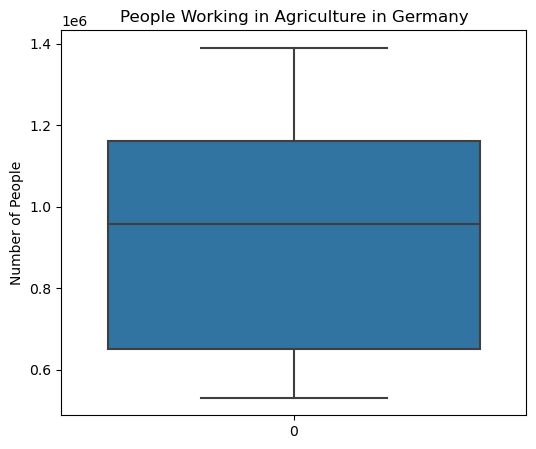

In [41]:
# 2. People who work in Germany Agriculture
fig = plt.figure(figsize =(6, 5))
plt.title("People Working in Agriculture in Germany")
plt.ylabel("Number of People")
sns.boxplot(germany);

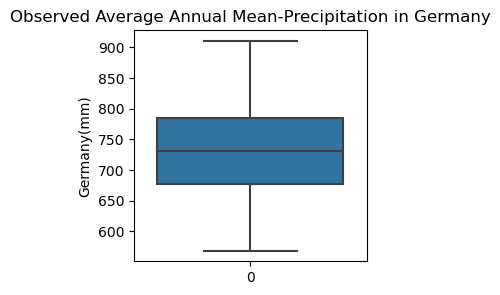

In [42]:
# 3. Observed Average Annual Mean Precipitation in Germany
fig = plt.figure(figsize =(3, 3))
plt.title("Observed Average Annual Mean-Precipitation in Germany")
plt.ylabel("Germany(mm)")
sns.boxplot(germany_mm);

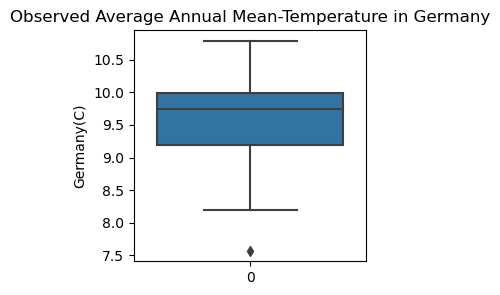

In [43]:
# 4. Observed Average Annual Mean-Temperature in Ireland
fig = plt.figure(figsize =(3, 3))
plt.title("Observed Average Annual Mean-Temperature in Germany")
plt.ylabel("Germany(C)")
sns.boxplot(germany_c);


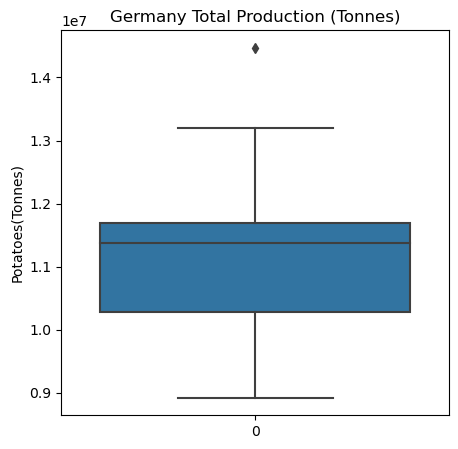

In [44]:
# 5. Ireland Total Production (Tonnes)
fig = plt.figure(figsize =(5, 5))
plt.title("Germany Total Production (Tonnes)")
plt.ylabel("Potatoes(Tonnes)")
sns.boxplot(germany_potatoes);

#### Netherland Boxplots

In [45]:
# Burada Anlaşılmayı Arttırmak İçin Böyle Yaptık bunu belirt!. 
hectares2           = netherland_dataset["Netherlands(hectares)"]
netherland          = netherland_dataset["Netherlands"]
netherland_mm       = netherland_dataset["Netherlands(mm)"]
netherland_c        = netherland_dataset["Netherlands(C)"]
netherland_potatoes = netherland_dataset["Potatoes(Tonnes)"]

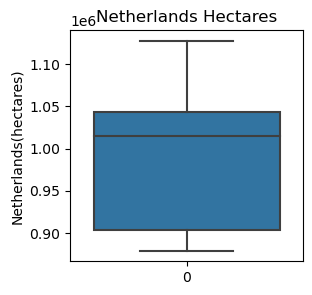

In [46]:
# 1. Hectares Boxplot
fig = plt.figure(figsize =(3, 3))
plt.title("Netherlands Hectares")
plt.ylabel("Netherlands(hectares)")
sns.boxplot(hectares2);

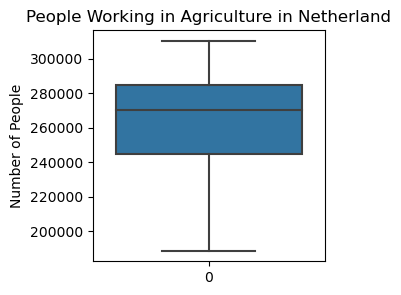

In [47]:
# 2. People who work in Netherland Agriculture
fig = plt.figure(figsize =(3, 3))
plt.title("People Working in Agriculture in Netherland")
plt.ylabel("Number of People")
sns.boxplot(netherland);

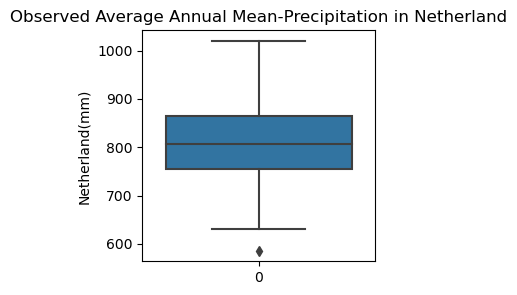

In [48]:
# 3. Observed Average Annual Mean Precipitation in Netherland
fig = plt.figure(figsize =(3, 3))
plt.title("Observed Average Annual Mean-Precipitation in Netherland")
plt.ylabel("Netherland(mm)")
sns.boxplot(netherland_mm);

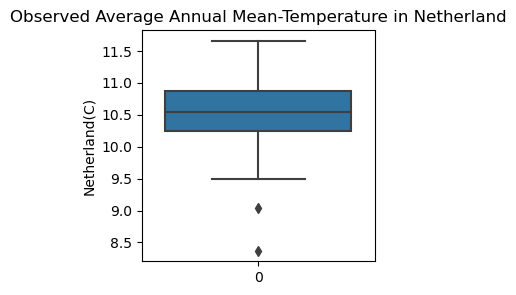

In [49]:
# 4. Observed Average Annual Mean-Temperature in Netherland
fig = plt.figure(figsize =(3, 3))
plt.title("Observed Average Annual Mean-Temperature in Netherland")
plt.ylabel("Netherland(C)")
sns.boxplot(netherland_c);

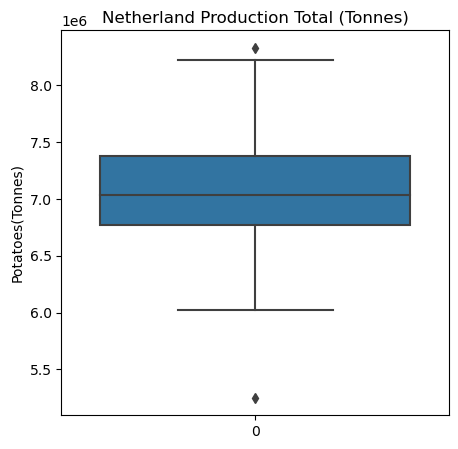

In [50]:
# 5. Netherland Total Production (Tonnes)
fig = plt.figure(figsize =(5, 5))
plt.title("Netherland Production Total (Tonnes)")
plt.ylabel("Potatoes(Tonnes)")
sns.boxplot(netherland_potatoes);

#### Skewness and Kurtosis

In [51]:
#Skewness = 0: Then normally distributed.
#Skewness > 0: Then more weight in the left tail of the distribution.
#Skewness < 0: Then more weight in the right tail of the distribution.


#kurtosis for normal distribution is equal to 3.
#For a distribution having kurtosis < 3: It is called playkurtic.
#For a distribution having kurtosis > 3, It is called leptokurtic and it signifies that it tries to produce more outliers rather than the normal distribution.

In [52]:
# Ireland Skewness
print("Ireland Dataset Skewness")
print("---------------------------------")
print(ireland_dataset.skew(axis = 0, skipna=True))

Ireland Dataset Skewness
---------------------------------
Year                 0.000000
Ireland(hectares)   -0.259119
Ireland              0.927390
Ireland(mm)          0.125509
Ireland(C)          -0.917392
Potatoes(Tonnes)     0.359197
dtype: float64


In [53]:
# Ireland Kurtosis
print("Ireland Dataset Kurtosis")
print("---------------------------------")
print(ireland_dataset.kurt(axis=0))

Ireland Dataset Kurtosis
---------------------------------
Year                -1.200000
Ireland(hectares)   -0.840105
Ireland             -0.591462
Ireland(mm)         -0.612021
Ireland(C)           1.304995
Potatoes(Tonnes)    -0.456339
dtype: float64


In [54]:
# Germany Skewness
print("Germany Dataset Skewness")
print("---------------------------------")
print(germany_dataset.skew(axis = 0, skipna = True))

Germany Dataset Skewness
---------------------------------
Germany(hectares)   -1.507499
Germany              0.084367
Germany(mm)         -0.002150
Germany(C)          -0.690212
Potatoes(Tonnes)     0.532707
dtype: float64


In [55]:
# Germany Kurtosis
print("Germany Dataset Kurtosis")
print("---------------------------------")
print(germany_dataset.kurt(axis=0))

Germany Dataset Kurtosis
---------------------------------
Germany(hectares)    2.933921
Germany             -1.375508
Germany(mm)          0.204451
Germany(C)           1.189728
Potatoes(Tonnes)     0.612444
dtype: float64


In [56]:
# Netherland Skewness
print("Netherland Dataset Skewness")
print("---------------------------------")
print(netherland_dataset.skew(axis = 0, skipna = True))

Netherland Dataset Skewness
---------------------------------
Netherlands(hectares)   -0.328114
Netherlands             -0.647296
Netherlands(mm)         -0.217814
Netherlands(C)          -0.999323
Potatoes(Tonnes)        -0.338224
dtype: float64


In [57]:
# Net Kurtosis
print("Netherland Dataset Kurtosis")
print("---------------------------------")
print(netherland_dataset.kurt(axis=0))

Netherland Dataset Kurtosis
---------------------------------
Netherlands(hectares)   -1.191318
Netherlands             -0.865510
Netherlands(mm)          0.063332
Netherlands(C)           1.815575
Potatoes(Tonnes)         1.219660
dtype: float64


#### 1.6  Inferential Statistics Process
In this section, the distribution of the data will be plotted, the standard error value will be found, the Z score will be calculated.

**Ireland Dataset Each Columns Distribution**

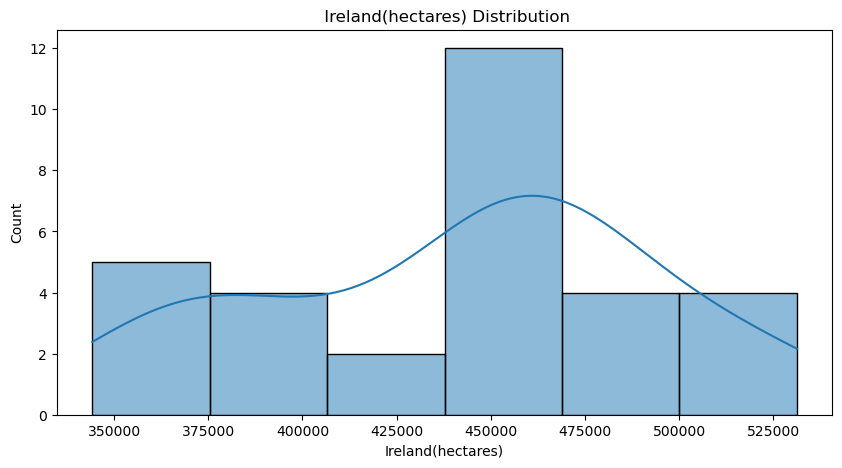

In [58]:
# 1.
plt.figure(figsize=(10,5))
graphHectares = sns.histplot(ireland_dataset['Ireland(hectares)'], kde=True).set(title=' Ireland(hectares) Distribution')

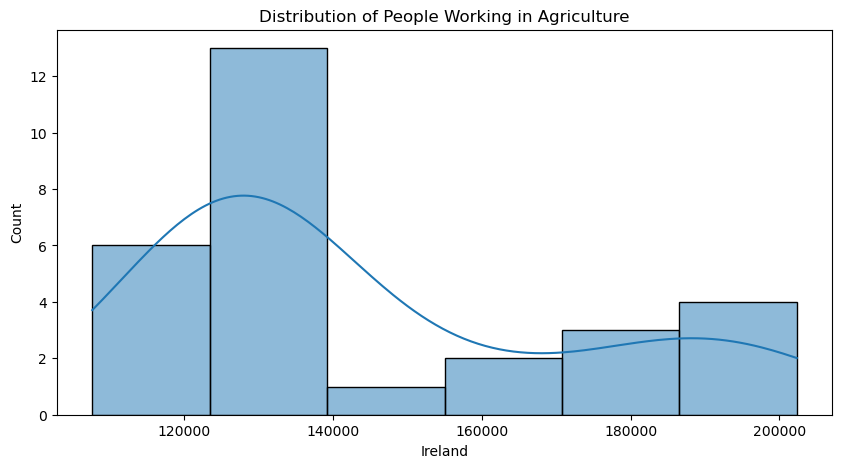

In [59]:
# 2
plt.figure(figsize=(10,5))
graphIreland = sns.histplot(ireland_dataset['Ireland'], kde=True).set(title="Distribution of People Working in Agriculture")

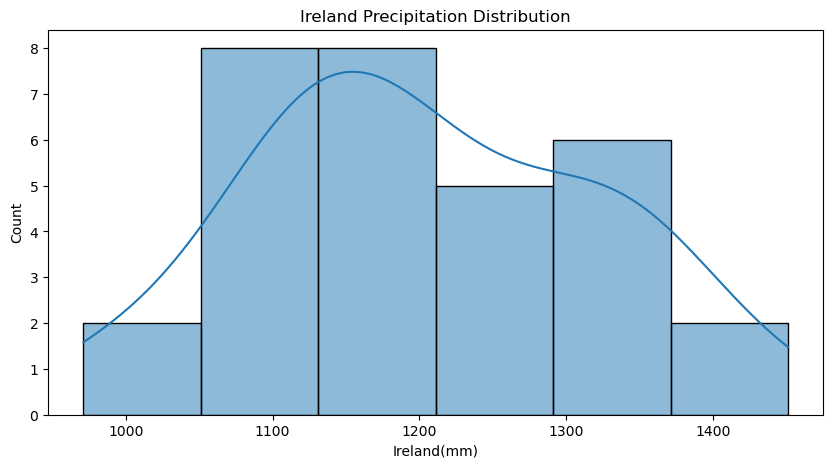

In [60]:
# 3
plt.figure(figsize=(10,5))
graphPrecipitation = sns.histplot(ireland_dataset["Ireland(mm)"], kde=True).set(title="Ireland Precipitation Distribution")

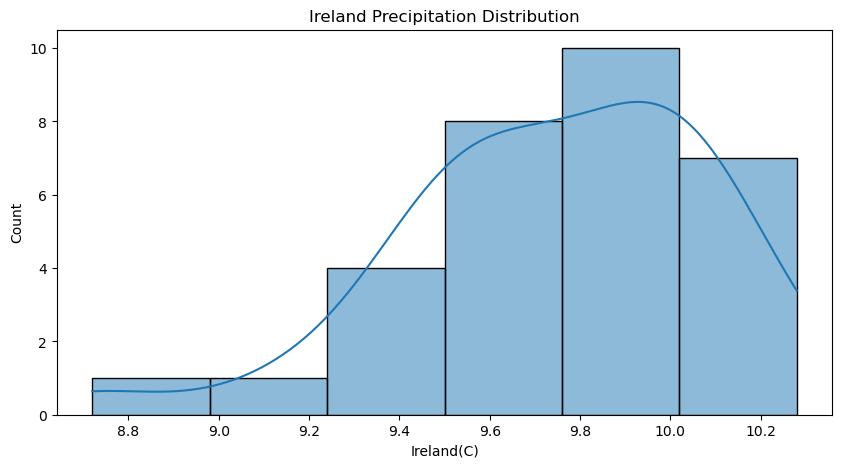

In [61]:
# 4
plt.figure(figsize=(10,5))
graphTemperature = sns.histplot(ireland_dataset["Ireland(C)"], kde=True).set(title="Ireland Precipitation Distribution")

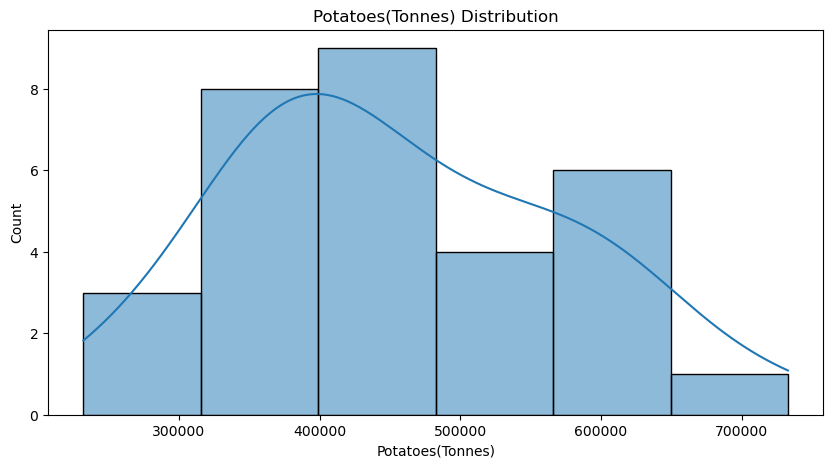

In [62]:
# 5
plt.figure(figsize=(10,5))
graphTonnes = sns.histplot(ireland_dataset["Potatoes(Tonnes)"], kde=True).set(title="Potatoes(Tonnes) Distribution")

**Germany Dataset Each Columns Distribution**

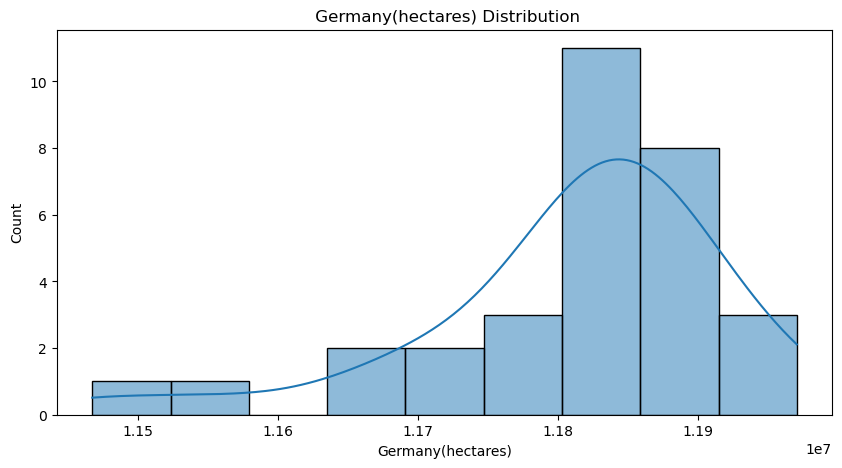

In [63]:
# 1
plt.figure(figsize=(10,5))
graphHectares_de = sns.histplot(germany_dataset['Germany(hectares)'], kde=True).set(title=' Germany(hectares) Distribution')

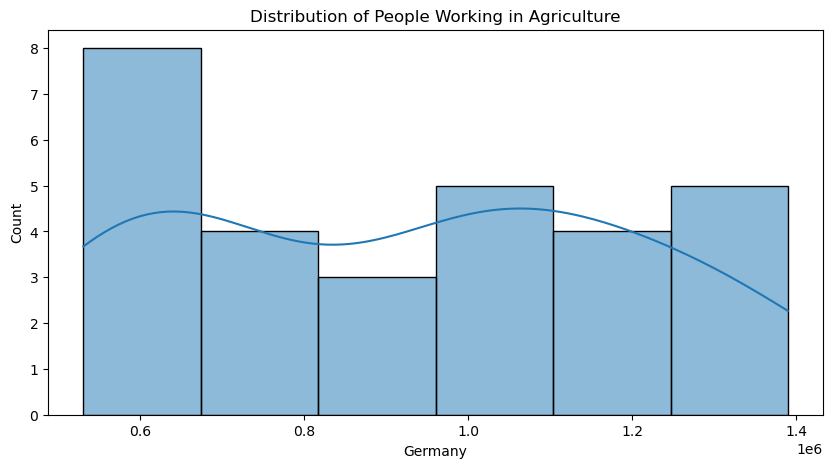

In [64]:
# 2
plt.figure(figsize=(10,5))
graphGermany = sns.histplot(germany_dataset['Germany'], kde=True).set(title="Distribution of People Working in Agriculture")

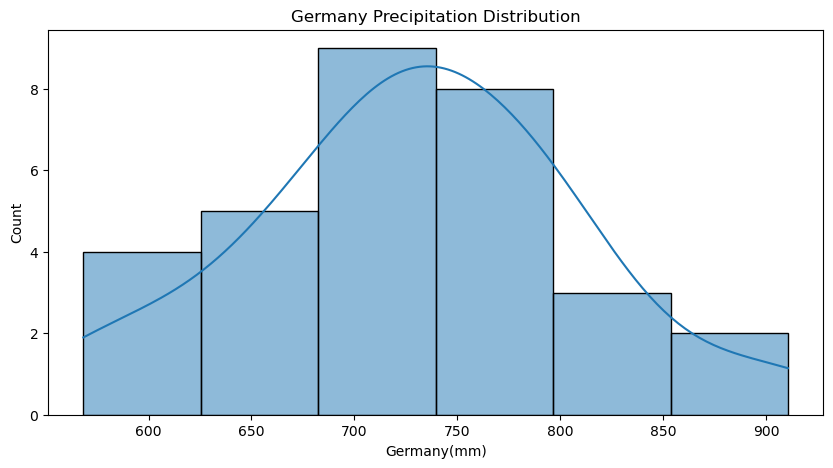

In [65]:
# 3
plt.figure(figsize=(10,5))
graphPrecipitation1 = sns.histplot(germany_dataset["Germany(mm)"], kde=True).set(title="Germany Precipitation Distribution")

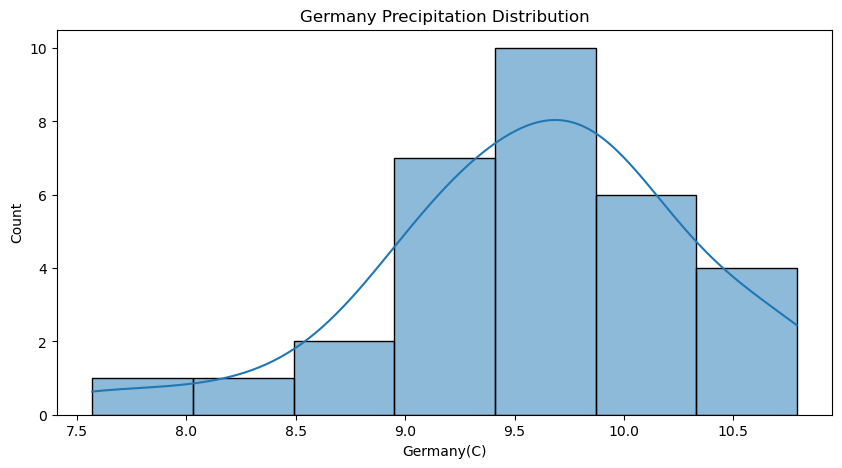

In [66]:
# 4
plt.figure(figsize=(10,5))
graphTemperature1 = sns.histplot(germany_dataset["Germany(C)"], kde=True).set(title="Germany Precipitation Distribution")

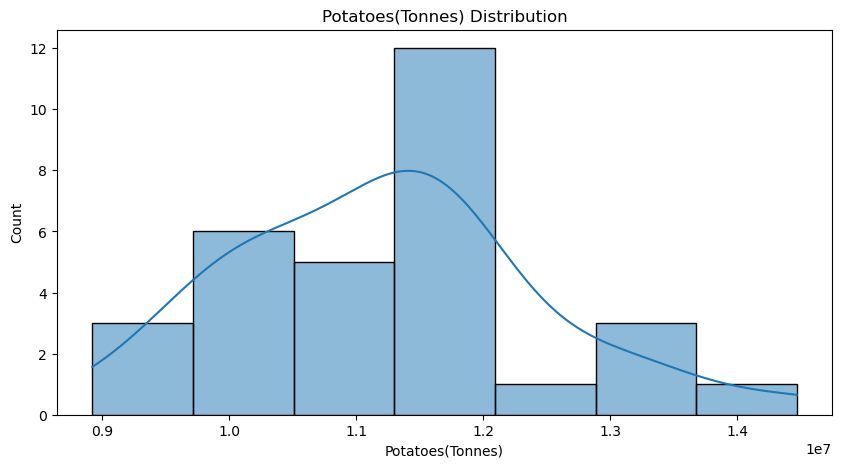

In [67]:
# 5
plt.figure(figsize=(10,5))
graphTonnes1 = sns.histplot(germany_dataset["Potatoes(Tonnes)"], kde=True).set(title="Potatoes(Tonnes) Distribution")

**Netherland Dataset Each Columns Distribution**

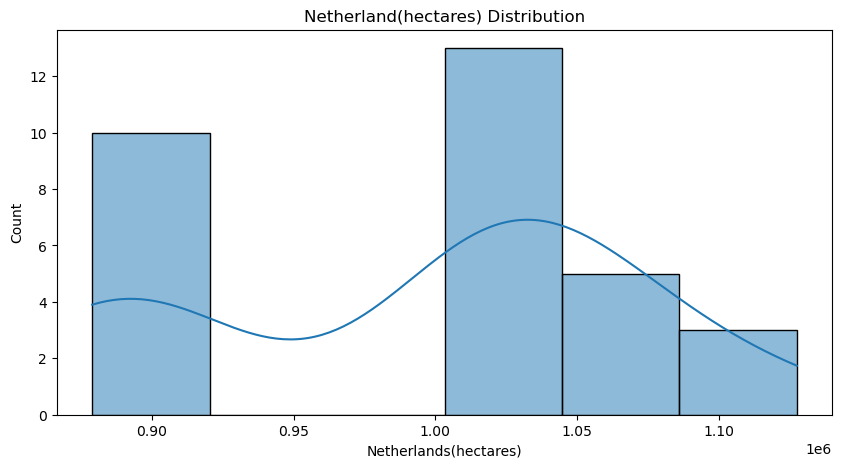

In [68]:
1
plt.figure(figsize=(10,5))
graphHectares = sns.histplot(netherland_dataset['Netherlands(hectares)'], kde=True).set(title='Netherland(hectares) Distribution')

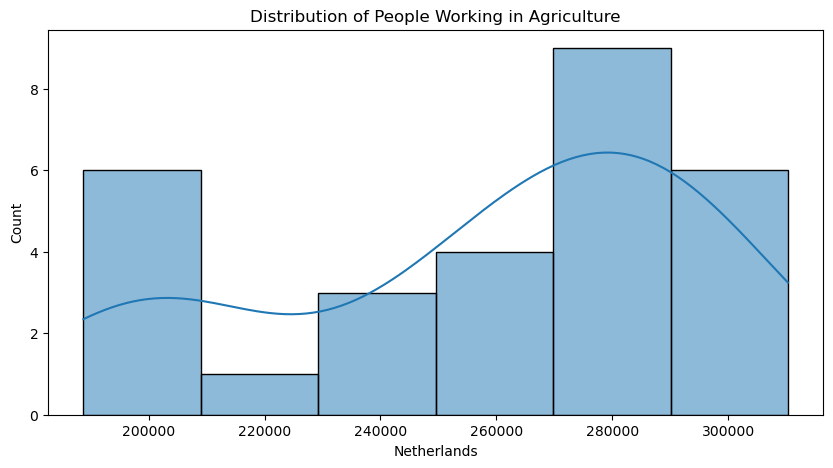

In [69]:
# 2
plt.figure(figsize=(10,5))
graphIreland = sns.histplot(netherland_dataset['Netherlands'], kde=True).set(title="Distribution of People Working in Agriculture")

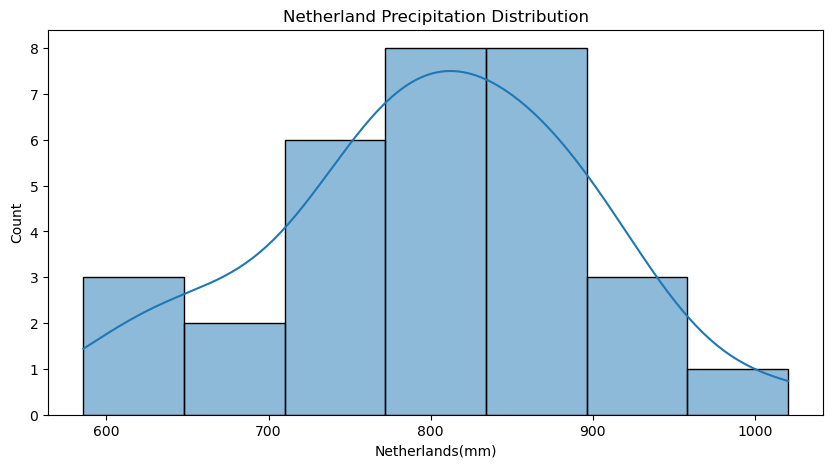

In [70]:
# 3.
plt.figure(figsize=(10,5))
graphPrecipitation = sns.histplot(netherland_dataset["Netherlands(mm)"], kde=True).set(title="Netherland Precipitation Distribution")

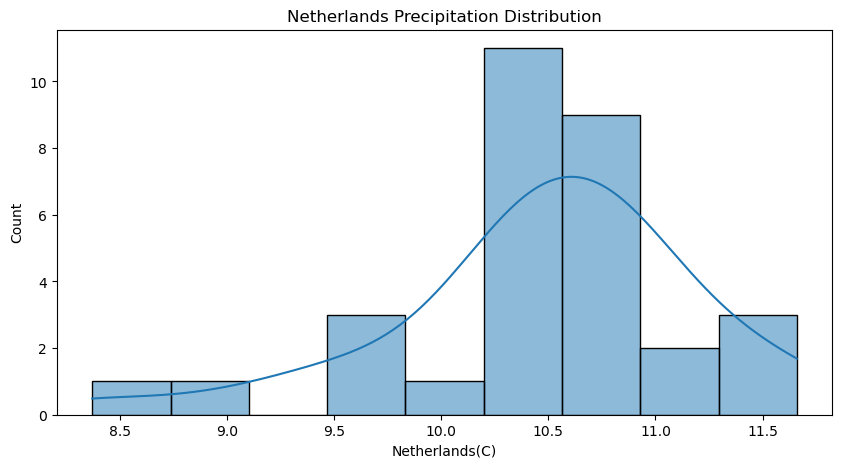

In [71]:
# 4.
plt.figure(figsize=(10,5))
graphTemperature = sns.histplot(netherland_dataset["Netherlands(C)"], kde=True).set(title="Netherlands Precipitation Distribution")

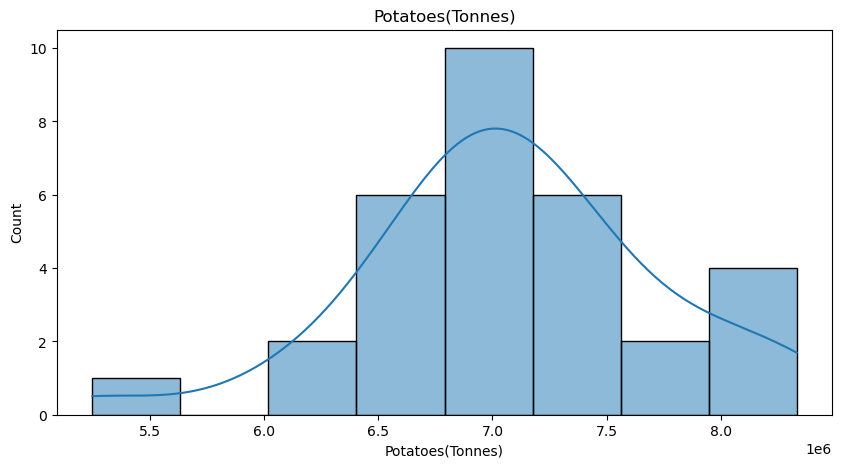

In [72]:
# 5.
plt.figure(figsize=(10,5))
graphTonnes = sns.histplot(netherland_dataset["Potatoes(Tonnes)"], kde=True).set(title="Potatoes(Tonnes)")

#### Statistical Analysis

In [82]:
# Datasets Here.
data1 = ireland_dataset["Potatoes(Tonnes)"].sample(n=30)
data2 = germany_dataset["Potatoes(Tonnes)"].sample(n=30)
data3 = netherland_dataset["Potatoes(Tonnes)"].sample(n=30)

#### Wilcoxon Test

In [83]:
# Wilcoxon Test for Ireland-Germany 
stat, p = wilcoxon(data1, data2, nan_policy="omit")
print("Statistics=%.3f, p=%.3f" % (stat, p))
alpha = 0.05
if p > alpha:
    print("No significant difference between median values ​​(H0 cannot be rejected)")
else:
    print("There is significant difference between median values (H0 can be rejected)")

Statistics=0.000, p=0.000
There is significant difference between median values (H0 can be rejected)


In [84]:
# Wilcoxon Test for Ireland-Netherland
stat, p = wilcoxon(data1, data3, nan_policy="omit")
print("Statistics=%.3f, p=%.3f" % (stat, p))
alpha = 0.05
if p > alpha:
    print("No significant difference between median values ​​(H0 cannot be rejected)")
else:
    print("There is significant difference between median values (H0 can be rejected)")

Statistics=0.000, p=0.000
There is significant difference between median values (H0 can be rejected)


#### One-Sample Hypothesis Test

In [85]:
# Ireland..
print("For Ireland..")
stat, p_ireland = ttest_1samp(data1, 0.8,nan_policy="omit")

# Test Result
print("Statistics=%.3f, p_ireland=%.3f" % (stat, p_ireland))

For Ireland..
Statistics=20.589, p_ireland=0.000


In [86]:
# Êvaluate P Value 
alpha = 0.05
if p_ireland > alpha:
    print("The mean of the dataset is equal to 0.8 (H0 cannot be rejected)")
else:
    print("The mean of the dataset does not equal 0.8 (H0 is rejected)")

The mean of the dataset does not equal 0.8 (H0 is rejected)


In [87]:
# Germany..
print("For Germany")
stat, p_germany = ttest_1samp(data2, 0.8,nan_policy="omit")

# Test sonucunu yazdıralım
print("Statistics=%.3f, p_germany=%.3f" % (stat, p_germany))

For Germany
Statistics=50.630, p_germany=0.000


In [88]:
# Êvaluate P Value 
alpha = 0.05
if p_germany > alpha:
    print("The mean of the dataset is equal to 0.8 (H0 cannot be rejected)")
else:
    print("The mean of the dataset does not equal 0.8 (H0 is rejected)")

The mean of the dataset does not equal 0.8 (H0 is rejected)


In [89]:
# Netherland..
print("For Netherland")
stat, p_netherland = ttest_1samp(data3, 0.8,nan_policy="omit")

# Test sonucunu yazdıralım
print("Statistics=%.3f, p_netherland=%.3f" % (stat, p_netherland))

For Netherland
Statistics=59.177, p_netherland=0.000


In [90]:
# Êvaluate P Value 
alpha = 0.05
if p_netherland > alpha:
    print("The mean of the dataset is equal to 0.8 (H0 cannot be rejected)")
else:
    print("The mean of the dataset does not equal 0.8 (H0 is rejected)")

The mean of the dataset does not equal 0.8 (H0 is rejected)


#### T-Test

In [91]:
# T-Test for Ireland-Germany..
stat, p = ttest_ind(data1, data2,nan_policy="omit")  # For ireland-germany
print("Statistics=%.3f, p=%.3f" % (stat, p))

Statistics=-48.326, p=0.000


In [92]:
# Evaluate P Value
alpha = 0.05
if p > alpha:
    print("No significant difference between median values ​​(H0 cannot be rejected)")
else:
    print("There is a significant difference between the median values ​​(H0 is rejected)")

There is a significant difference between the median values ​​(H0 is rejected)


In [93]:
# T-Test for Ireland-Netherland
stat, p = ttest_ind(data1, data3,nan_policy="omit")  # For ireland-netherland
print("Statistics=%.3f, p=%.3f" % (stat, p))

Statistics=-54.411, p=0.000


In [94]:
# Evaluate P Value
alpha = 0.05
if p > alpha:
    print("No significant difference between median values ​​(H0 cannot be rejected)")
else:
    print("There is a significant difference between the median values ​​(H0 is rejected)")

There is a significant difference between the median values ​​(H0 is rejected)


#### Analysis of Variance

In [95]:
# Anova for Ireland-Germany
stat, p = f_oneway(data1, data2)

# Test sonucunu yazdıralım
print("Statistics=%.3f, p=%.3f" % (stat, p))

# p değerini değerlendirelim
alpha = 0.05
if p > alpha:
    print("No significant difference between median values ​​(H0 cannot be rejected)")
else:
    print("There is a significant difference between the median values ​​(H0 is rejected)")

Statistics=2335.370, p=0.000
There is a significant difference between the median values ​​(H0 is rejected)


In [96]:
# Anova for Ireland-Netherland
stat, p = f_oneway(data1, data3)

# Test sonucunu yazdıralım
print("Statistics=%.3f, p=%.3f" % (stat, p))

# p değerini değerlendirelim
alpha = 0.05
if p > alpha:
    print("No significant difference between median values ​​(H0 cannot be rejected)")
else:
    print("There is a significant difference between the median values ​​(H0 is rejected)")

Statistics=2960.587, p=0.000
There is a significant difference between the median values ​​(H0 is rejected)


#### Mann-Whitney U

In [97]:
# For Ireland-Germany
statistic,p_value = mannwhitneyu(data1,data2,nan_policy="omit")
print("Statistic:",statistic)
print("p-value:",p_value)

Statistic: 0.0
p-value: 3.019859359162157e-11


In [98]:
# For Ireland-Netherland
statistic,p_value = mannwhitneyu(data1,data3,nan_policy="omit")
print("Statistic:",statistic)
print("p-value:",p_value)

Statistic: 0.0
p-value: 3.019859359162157e-11


#### Standart Error

In [99]:
from scipy.stats import sem
sem_1 = sem(data1)
sem_2 = sem(data2)
sem_3 = sem(data3)
print("SEM for Ireland Dataset..:",sem_1)
print("SEM for Germany Dataset..:",sem_2)
print("SEM for Netherland Dataset..:",sem_3)


SEM for Ireland Dataset..: 22261.234434180078
SEM for Germany Dataset..: 222225.1784508508
SEM for Netherland Dataset..: 119626.21772359466


#### Z Score

In [100]:
# Ireland.
stats.zscore(ireland_dataset, nan_policy="omit").head(5)

,Year,Ireland(hectares),Ireland,Ireland(mm),Ireland(C),Potatoes(Tonnes)
0,-1.677051,-1.155283,NaN,-0.148952,0.795331,1.256196
1,-1.565248,-1.389801,2.083037,-1.145075,-0.700741,0.969711
2,-1.453444,-1.897922,1.845481,-0.637108,-0.880270,1.534255
3,-1.341641,-1.507060,1.816780,0.221539,-1.388934,0.952859
4,-1.229837,-1.682948,1.685971,0.903861,-0.760584,1.567959


In [101]:
# Germany.
from scipy.stats import zscore
stats.zscore(germany_dataset, nan_policy="omit").head(5)

,Germany(hectares),Germany,Germany(mm),Germany(C),Potatoes(Tonnes)
0,1.520986,NaN,0.064354,0.303118,2.740417
1,-2.385315,1.692377,-1.578189,-1.241536,-0.872746
2,-3.257596,1.584266,0.075475,0.059978,-0.283792
3,-1.276001,1.476154,0.813975,-1.198629,0.869749
4,-0.052912,1.368043,0.760015,0.489048,-1.323245


In [102]:
# Netherland.
from scipy.stats import zscore
stats.zscore(netherland_dataset, nan_policy="omit").head(5)

,Netherlands(hectares),Netherlands,Netherlands(mm),Netherlands(C),Potatoes(Tonnes)
0,-1.509463,NaN,-0.724050,0.377557,-0.056979
1,-1.483190,1.084415,-1.469013,-1.383135,-0.194028
2,-1.404372,1.034355,0.156643,-0.127559,0.895757
3,-1.404372,0.939892,0.729547,-1.426431,0.986336
4,-1.430645,0.895273,0.933977,0.103351,0.024621


# <font color='red'>Section 2. Data Preparation</font>

#### 2.1 Finding Null Values

In [103]:
# 2.1.1 Ireland Dataset.. 

def missing_values_table(ireland_dataset):
    missing_value = ireland_dataset.isnull().sum()
    missing_val_percent = 100*missing_value/len(ireland_dataset)
    missing_val_table = pd.concat([missing_value, missing_val_percent], axis=1)
    missing_val_table_rename_columns = missing_val_table.rename(columns ={0 :"Missing Value",
                                                                          1 :"% of Total Values"})
    missing_val_table_rename_columns = missing_val_table_rename_columns[missing_val_table_rename_columns.iloc[:,1] != 0].sort_values("% of Total Values",
                                                                                                                                     ascending=False).round(1)
    print ("Your selected dataframe has " + str(ireland_dataset.shape[1]) + " columns.\n"      
            "There are " + str(missing_val_table_rename_columns.shape[0]) +
              " columns that have missing values.")
    return missing_val_table_rename_columns

missing_values_table(ireland_dataset)

Your selected dataframe has 6 columns.
There are 1 columns that have missing values.


,Missing Value,% of Total Values
Ireland,2,6.5


In [104]:
# 2.1.2 Germany Dataset

def missing_values_table(germany_dataset):
    missing_value = germany_dataset.isnull().sum()
    missing_val_percent = 100*missing_value/len(germany_dataset)
    missing_val_table = pd.concat([missing_value, missing_val_percent], axis=1)
    missing_val_table_rename_columns = missing_val_table.rename(columns ={0 :"Missing Value",
                                                                          1 :"% of Total Values"})
    missing_val_table_rename_columns = missing_val_table_rename_columns[missing_val_table_rename_columns.iloc[:,1] != 0].sort_values("% of Total Values",
                                                                                                                                     ascending=False).round(1)
    print ("Your selected dataframe has " + str(germany_dataset.shape[1]) + " columns.\n"      
            "There are " + str(missing_val_table_rename_columns.shape[0]) +
              " columns that have missing values.")
    return missing_val_table_rename_columns

missing_values_table(germany_dataset)

Your selected dataframe has 5 columns.
There are 1 columns that have missing values.


,Missing Value,% of Total Values
Germany,2,6.5


In [105]:
# 2.1.3 Netherland Dataset

def missing_values_table(germany_dataset):
    missing_value = netherland_dataset.isnull().sum()
    missing_val_percent = 100*missing_value/len(netherland_dataset)
    missing_val_table = pd.concat([missing_value, missing_val_percent], axis=1)
    missing_val_table_rename_columns = missing_val_table.rename(columns ={0 :"Missing Value",
                                                                          1 :"% of Total Values"})
    missing_val_table_rename_columns = missing_val_table_rename_columns[missing_val_table_rename_columns.iloc[:,1] != 0].sort_values("% of Total Values",
                                                                                                                                     ascending=False).round(1)
    print ("Your selected dataframe has " + str(netherland_dataset.shape[1]) + " columns.\n"      
            "There are " + str(missing_val_table_rename_columns.shape[0]) +
              " columns that have missing values.")
    return missing_val_table_rename_columns

missing_values_table(netherland_dataset)

Your selected dataframe has 5 columns.
There are 1 columns that have missing values.


,Missing Value,% of Total Values
Netherlands,2,6.5


#### 2.2 Missing Value in Dataset

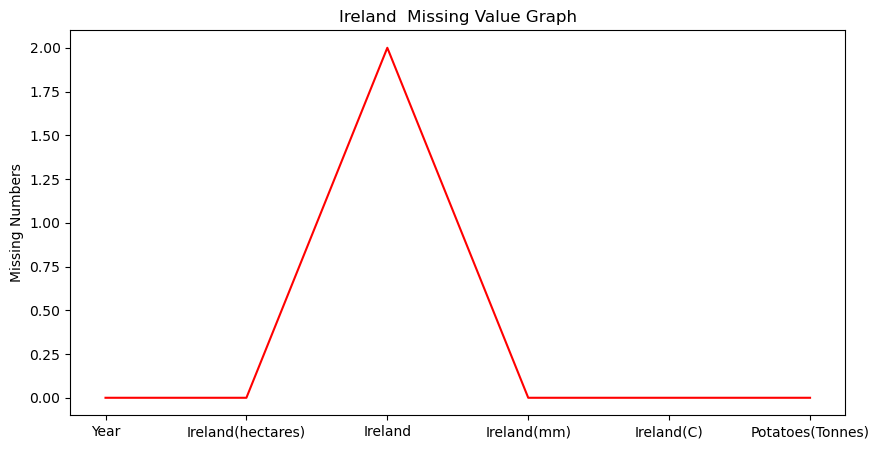

In [106]:
# 2.2.1 Draw Missing Data in Ireland..
plt.figure(figsize=(10,5))
ireland_dataset.isnull().sum().plot(color='r')

plt.title("Ireland  Missing Value Graph");
plt.ylabel("Missing Numbers");


In [107]:
# 2.2.1.1 Solving the Missing Values Problem
ireland = ireland_dataset.iloc[:,2:3]
irelandMean = round(ireland.mean())

ireland_dataset1 = ireland_dataset.drop(["Ireland"], axis=1)
ireland1 = ireland.fillna(irelandMean)

# Dataset.
ireland_potatoes = pd.concat([ireland_dataset1,ireland1], axis=1)

# 2.2.1.2. Check Missing Values.
ireland_potatoes.isnull().sum()

Year                 0
Ireland(hectares)    0
Ireland(mm)          0
Ireland(C)           0
Potatoes(Tonnes)     0
Ireland              0
dtype: int64

Text(0, 0.5, 'Missing Numbers')

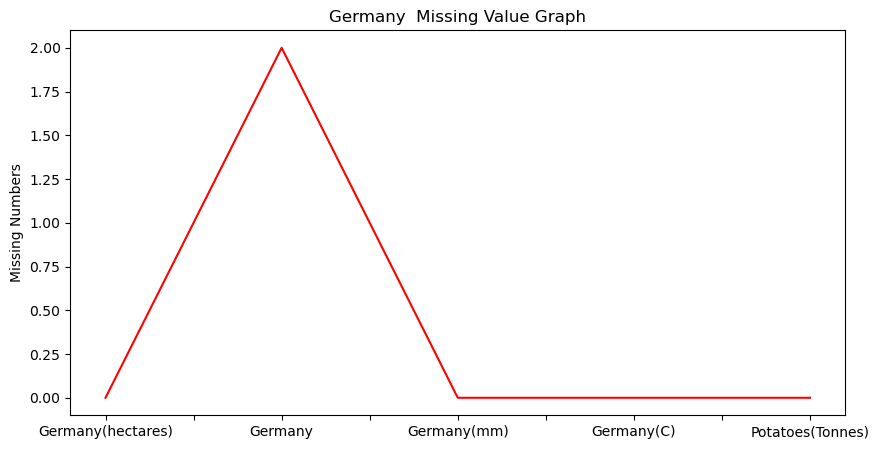

In [108]:
# 2.2.2 Draw Missing Data in Germany..
plt.figure(figsize=(10,5))
germany_dataset.isnull().sum().plot(color='r')

plt.title("Germany  Missing Value Graph")
plt.ylabel("Missing Numbers")

In [109]:
# 2.2.2.1 Solving the Missing Values Problem
germany = germany_dataset.iloc[:,1:2]
germanyMean = germany.mean()

germany_dataset1 = germany_dataset.drop(["Germany"], axis=1)
germany1 = germany.fillna(germanyMean)

# Dataset.
germany_potatoes = pd.concat([germany_dataset1,germany1], axis=1)

# 2.2.1.2. Check Missing Values.
germany_potatoes.isnull().sum()

Germany(hectares)    0
Germany(mm)          0
Germany(C)           0
Potatoes(Tonnes)     0
Germany              0
dtype: int64

Text(0, 0.5, 'Missing Numbers')

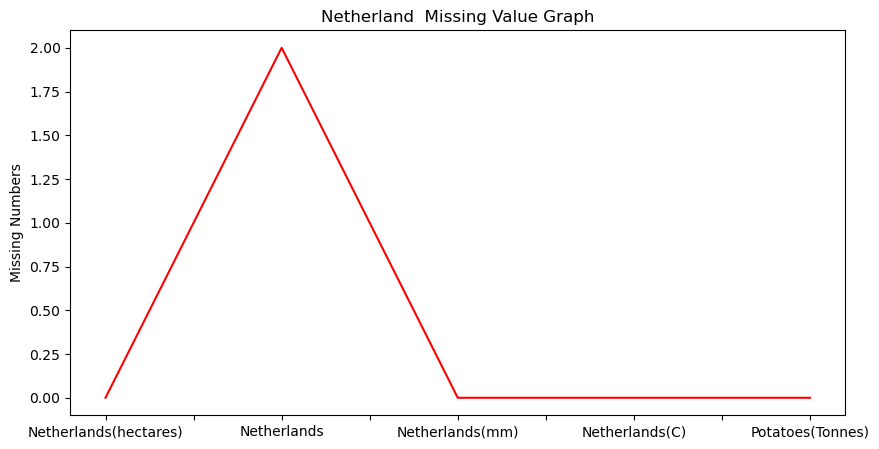

In [110]:
# 2.2.3 Draw Missing Data in Netherland.
plt.figure(figsize=(10,5))
netherland_dataset.isnull().sum().plot(color='r')

plt.title("Netherland  Missing Value Graph")
plt.ylabel("Missing Numbers")

In [111]:
# 2.2.3.1 Solving the Missing Values Problem
netherland = netherland_dataset.iloc[:,1:2]
netherlandMean = netherland.mean()

netherland_dataset1 = netherland_dataset.drop(["Netherlands"], axis=1)
netherland1 = netherland.fillna(netherlandMean)

# Dataset.
netherland_potatoes = pd.concat([netherland_dataset1,netherland1], axis=1)

# 2.2.1.2. Check Missing Values.
netherland_potatoes.isnull().sum()

Netherlands(hectares)    0
Netherlands(mm)          0
Netherlands(C)           0
Potatoes(Tonnes)         0
Netherlands              0
dtype: int64

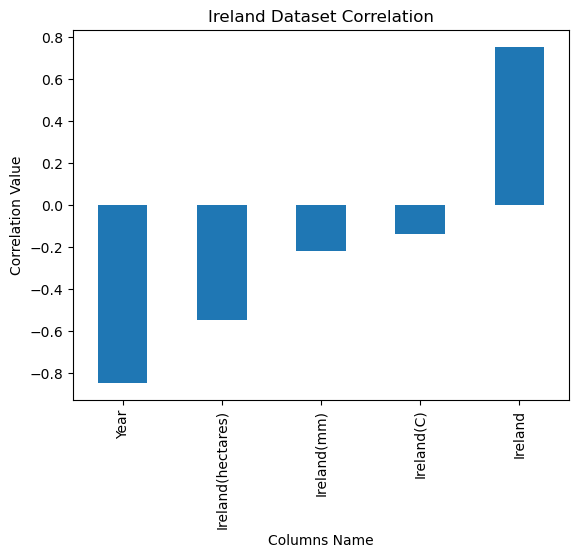

In [119]:
# Remember Correlation and Visualize It

# 1. For Ireland..
ireland_potatoes.corr()["Potatoes(Tonnes)"].sort_values().drop("Potatoes(Tonnes)").plot(kind="bar");
plt.xlabel("Columns Name");
plt.ylabel("Correlation Value");
plt.title("Ireland Dataset Correlation");

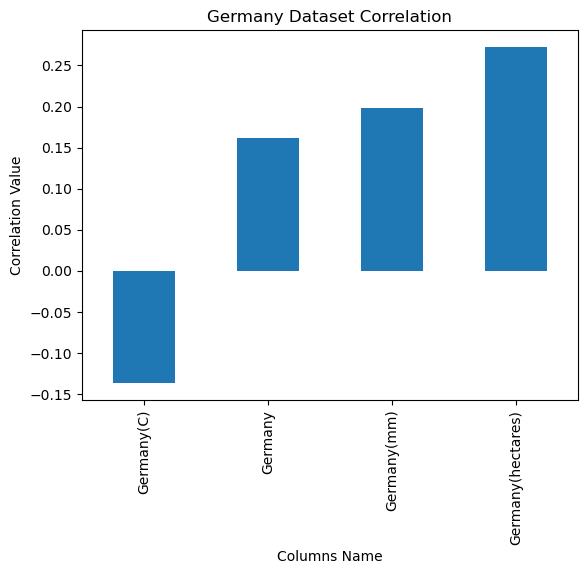

In [120]:
# 1. For Germany..
germany_potatoes.corr()["Potatoes(Tonnes)"].sort_values().drop("Potatoes(Tonnes)").plot(kind="bar");
plt.xlabel("Columns Name");
plt.ylabel("Correlation Value");
plt.title("Germany Dataset Correlation");

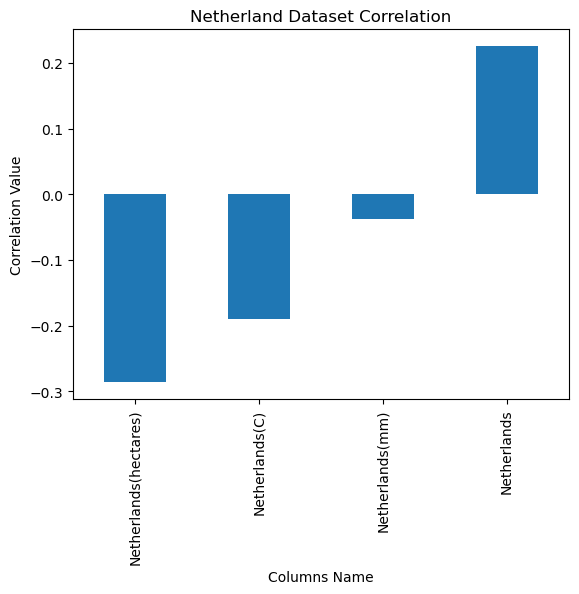

In [122]:
# 1. For Netherland..
netherland_potatoes.corr()["Potatoes(Tonnes)"].sort_values().drop("Potatoes(Tonnes)").plot(kind="bar");
plt.xlabel("Columns Name");
plt.ylabel("Correlation Value");
plt.title("Netherland Dataset Correlation");

#### 2.3 Outlier Data Analysis

In [ ]:
# 2.3.2 Deleting Outliers in Ireland.
without_outlier_ireland  = ireland_potatoes.drop([3],  axis=0)
without_outlier_ireland  = ireland_potatoes.drop([28], axis=0)
without_outlier_ireland  = ireland_potatoes.drop([30], axis=0)

In [134]:
# 2.3.3 Germany Dataset..
anomaly = LocalOutlierFactor(n_neighbors=5)
anomaly_germany = anomaly.fit_predict(germany_potatoes)

# 2.3.4 Show This Outlier.
germany_potatoes[anomaly_germany == -1]

,Germany(hectares),Germany(mm),Germany(C),Potatoes(Tonnes),Germany
0,11971000.0,734.15,9.81,14471000.0,9.203789e+05
2,11467000.0,735.03,9.64,10896995.0,1.360000e+06
3,11676000.0,793.47,8.76,12260248.0,1.330000e+06
6,11835000.0,622.39,7.57,13099568.0,1.170000e+06
10,11804000.0,757.74,10.09,13192951.0,1.060000e+06
14,11898000.0,731.39,9.14,13043559.0,9.572140e+05
28,11731000.0,571.21,10.74,8920800.0,5.445290e+05


In [135]:
# 2.3.5 Germany Dataset..
anomaly = LocalOutlierFactor(n_neighbors=5)
anomaly_netherland = anomaly.fit_predict(netherland_potatoes)

# 2.3.6 Show This Outlier.
netherland_potatoes[anomaly_netherland == -1]

,Netherlands(hectares),Netherlands(mm),Netherlands(C),Potatoes(Tonnes),Netherlands
8,906000.0,1020.33,10.21,5249400.0,272609.0
28,1021000.0,633.68,11.40,6025370.0,193802.0
